In [19]:
%pip install python-chess

import chess
board = chess.Board()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


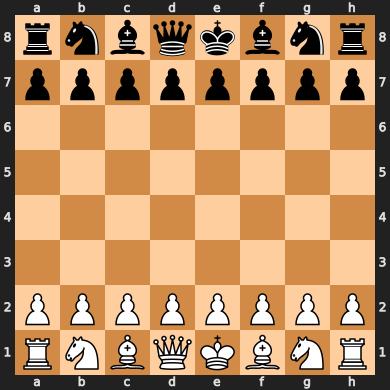

In [20]:
print(board)
board

In [21]:
for move in board.legal_moves:
    print(move)

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


# Mỗi nước đi được kí hiệu 4 kí tự và được chia làm 2 phần 
+ Ô xuất phát (nơi di chuyển quân cờ)
+ Ô đích (nơi quân cờ đến)
# Ví dụ c2c3 
+ di chuyển quân tốt từ ô c2 đến c3
+ Chúng ta có thể tìm cột có nhãn là c (được gọi là "c file"), và sau đó tìm hàng có nhãn là 2 (được gọi là "2 rank")
+ c3 là ô phía trên c2 là nước đi đúng của quân tốt có

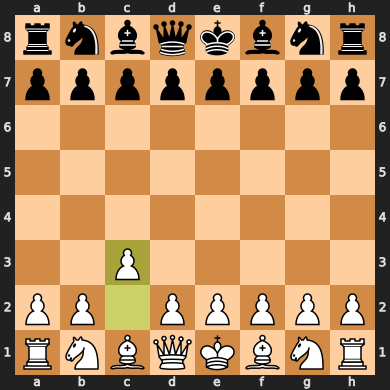

In [22]:
board.push_san('c2c3')

board

In [23]:
for move in board.legal_moves:
    print(move)

g8h6
g8f6
b8c6
b8a6
h7h6
g7g6
f7f6
e7e6
d7d6
c7c6
b7b6
a7a6
h7h5
g7g5
f7f5
e7e5
d7d5
c7c5
b7b5
a7a5


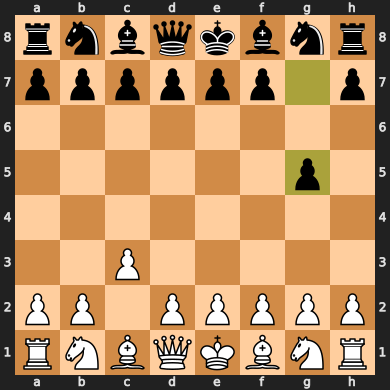

In [24]:
board.push_san('g7g5')
board

In [25]:
#kiểm tra xem bên nào thắng
print(board.outcome())
# nếu là None thì chưa kết thúc
# nếu là 1-0 thì bên trắng thắng
# nếu là 0-1 thì bên đen thắng
# nếu là 1/2-1/2 thì hòa


None


In [26]:
board.fen()
# trả về vị trí các quân cờ trên bàn cờ

'rnbqkbnr/pppppp1p/8/6p1/8/2P5/PP1PPPPP/RNBQKBNR w KQkq - 0 2'

## Hãy cùng phân tích điều này!

* Phần đầu tiên của FEN chỉ cho chúng ta thấy những gì có trên bàn cờ. Mỗi hàng trên bàn cờ của chúng ta được tách ra bằng dấu gạch chéo, vì vậy chúng ta có thể viết lại phần này như sau:
```
 rnbqkbnr 
 pppppp1p 
 8
 6p1
 8
 2P5
 PP1PPPPP
 RNBQKBNR

```
* Để giữ cho mọi thứ gọn gàng, FEN không hiển thị các khoảng trống lặp lại, nó chỉ thay thế chúng bằng một con số. Vì vậy, ví dụ, số 8 ở dòng thứ 3 từ trên xuống có nghĩa là "8 khoảng trống". Chúng ta có thể thay thế tất cả các số bằng số lượng dấu chấm tương ứng, chỉ để làm rõ điều này (đây là định dạng mà python-chess cho chúng ta khi chúng ta chỉ in ra bàn cờ):

In [27]:
print(board)

r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . . . . . .
. . P . . . . .
P P . P P P P P
R N B Q K B N R



+ Phần tiếp theo của FEN sẽ luôn là một chữ w hoặc b, cho biết ai đến lượt. Vì vậy, trong FEN của chúng ta ở trên

rnbqkbnr/pppppp1p/8/6p1/8/2P5/PP1PPPPP/RNBQKBNR w KQkq - 0 2

 + chữ w có nghĩa là lượt đi của trắng.

 + Sau đó, chúng ta có một vài trường cho các quy tắc đặc biệt mà chúng ta sẽ không nói nhiều: nhập thành, en passant, và quy tắc năm mươi nước đi.

 + KQkq có nghĩa là cả đen và trắng đều có thể nhập thành bên vua và bên hậu.
 + '-' có nghĩa là không có nước đi en passant nào khả dụng.
 + 0 có nghĩa là không có nước đi nào kể từ lần bắt hoặc bước tiến của quân tốt.

 + Trường cuối cùng là bộ đếm lượt đi. Bạn có thể thấy bộ đếm lượt của chúng ta đang ở số 2, điều này hợp lý vì trắng đã đi 1 lượt và đen đã đi 1 lượt, tổng cộng là 2!

# Chuẩn bị dữ liệu

Trước khi đưa đầu vào của chúng ta vào một mạng nơ-ron để huấn luyện, chúng ta cần biến tất cả thành các con số.

Khi chúng ta thay thế các con số bằng các dấu chấm, ký hiệu FEN của chúng ta khá gần – đó là một lưới 8x8 các ký tự.
```
r n b q k b n r  
p p p p p p p p  
. . . . . . . .  
. . . . . . . .  
. . . . . . . .  
. . . . . . . .  
P P P P P P P P  
R N B Q K B N R
```  
Một chiến lược phổ biến trong học máy là mã hóa one hot đầu vào của chúng ta. Hiện tại có 13 ký tự khác nhau trên bàn cờ của chúng ta: 6 quân cờ in hoa (trắng), 6 quân cờ in thường (đen) và . cho các không gian trống. Vì vậy, chúng ta có thể mã hóa one-hot đầu vào của mình với một danh sách 13 phần tử, một cho mỗi loại quân cờ:

Đây có thể là mã hóa one hot cho một quân V bishop trắng:
```
 r n b q k p R N B Q K P .  
[0 0 0 0 0 0 0 0 1 0 0 0 0]  
```
Và đây có thể là mã hóa one hot cho một không gian trống:
```

 r n b q k p R N B Q K P .  
[0 0 0 0 0 0 0 0 0 0 0 0 1]  
```
Lưu ý trong cả hai ví dụ, chúng ta chỉ có 1 1, và tất cả các phần còn lại đều là số không.

In [28]:
import numpy as np

def one_hot_encode_peice(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

# Let's test on a black bishop
one_hot_encode_peice('b')

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
def encode_board(board):
    # first lets turn the board into a string
    board_str = str(board)
    # then lets remove all the spaces
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_peice(piece))
        board_list.append(row_list)
    return np.array(board_list)

# Let's test on the starting board
encode_board(chess.Board())

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

    

In [30]:
import pandas as pd

train_df = pd.read_csv('Data/train.csv', index_col= 'id')
train_df = train_df[:40000]
val_df = train_df[-1000:]

train_df.head()

,board,black_score,best_move
id,,,
80091,6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118,0.0,g8d8
18578,r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...,-131.0,f3e5
11580,r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...,-490.0,g6f7
72805,8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85,-574.0,h6h5
74310,8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90,0.0,e5e6


In [31]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

# We'll stack all our encoded boards into a single numpy array
X_train = np.stack(train_df['board'].apply(encode_fen_string))
y_train = train_df['black_score']


X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

# Building our model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# With the Keras Sequential model we can stack neural network layers together
model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

In [33]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val))

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 145385.0000 - val_loss: 134543.6250
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 115187.7344 - val_loss: 97705.3984
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 105296.7031 - val_loss: 100114.6094
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 91316.5859 - val_loss: 68697.1875
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 81199.1797 - val_loss: 59638.7578
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 71808.1875 - val_loss: 52201.5742
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 59340.3203 - val_loss: 49468.6953
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 63151.9727 - val_loss: 45038.5742
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 49588.1484 - val_loss: 39058.8438
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 47090.5156 - val_loss: 40098.6914
Epoch 11/50
1250

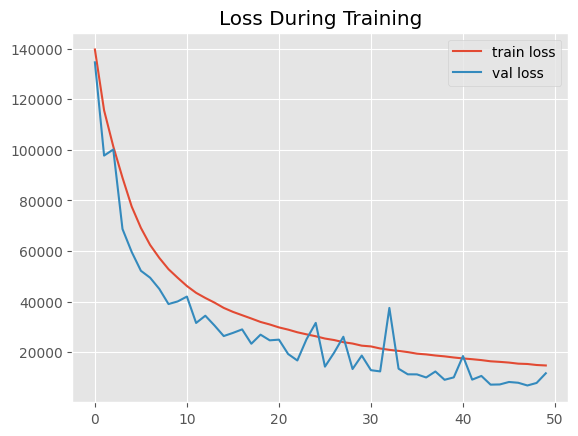

In [34]:
import matplotlib.pyplot as plt

# Lets plot the history of our training session to see how things progressed over time
plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

In [35]:
from IPython.display import SVG, display

def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        # We print out the board as an SVG
        display(SVG(board._repr_svg_()))

        # If it's white's turn, we have the user play
        if board.turn == chess.WHITE:
            user_move = input('Your move: ')
            if user_move == 'quit':
                break
            # The move a user puts in isn't a valid move, we keep prompting them for a valid move
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasn\'t a valid move. Please enter a move in Standard Algebraic Notation')
                user_move = input('Your move: ')
            board.push_san(user_move)

        # If it's black's turn, we have the AI play
        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())


In [ ]:
def play_nn(fen, show_move_evaluations=False, player='b'):
    # We can create a python-chess board instance from the FEN string like this:
    board = chess.Board(fen=fen)

    # And then evaluate all legal moves
    moves = []
    for move in board.legal_moves:
        # For each move, we'll make a copy of the board and try that move out
        candidate_board = board.copy()
        candidate_board.push(move)
        input_vector = encode_board(candidate_board).astype(np.float32)  # Giữ nguyên shape (8, 8, 13)
        input_vector = np.expand_dims(input_vector, axis=0)  # Thêm batch dimension, thành (1, 8, 8, 13)

        # This is where our model gets to shine! It tells us how good the resultant score board is for black:
        score = model.predict(input_vector, verbose=0)[0][0]
        moves.append((score, move))
        if show_move_evaluations:
            print(f'{move}: {score}')
    
    # By default sorting our moves will put the lowest scores at the top.
    # This would give us the right answer if we were playing as white,
    # but if we're playing as black we want to reverse things (then grab the first move):
    best_move = sorted(moves, reverse=player=='b')[0][1]

    # Now we turn our move into a string, return it and call it a day!
    return str(best_move)


# Mô hình tổng hợp 
#### Cho đến nay, chúng tôi luôn sử dụng một mạng nơ-ron đơn để thực hiện tất cả các nước đi của mình. Điều này đã hoạt động khá tốt, nhưng không tận dụng được thực tế là có rất nhiều kỹ năng khác nhau được sử dụng ở các điểm khác nhau trong một ván cờ.

#### Ví dụ, đôi khi chúng tôi sẽ chia một ván cờ thành 3 phần:

- Mở đầu
- Giữa ván
- Kết thúc
#### Một số kỳ thủ có thể đã ghi nhớ nhiều khai cuộc mạnh mẽ, nhưng gặp khó khăn trong việc thực hiện chiếu hết ở giai đoạn kết thúc. Cá nhân tôi có một giai đoạn kết thúc tạm ổn (so với toàn bộ ván cờ của tôi thì rất tệ) nhưng giai đoạn giữa của tôi thì khá khó khăn.

#### Thực tế rằng cờ vua có thể được chia thành những loại vấn đề khác nhau có nghĩa là việc xây dựng một mô hình tập hợp có thể hoạt động tốt ở đây. Ý tưởng chung đằng sau các mô hình tập hợp là tạo ra nhiều mô hình chuyên gia trong các phần khác nhau của tập dữ liệu của bạn, sau đó sử dụng chúng cùng nhau để tạo ra các dự đoán cuối cùng.

In [37]:
%pip install python-chess
import chess
import numpy as np

def one_hot_encode_piece(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

def encode_board(board):
    # first lets turn the board into a string
    board_str = str(board)
    # then lets remove all the spaces
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_piece(piece))
        board_list.append(row_list)
    return np.array(board_list)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd

train_df = pd.read_csv('Data/train.csv', index_col='id')
train_df.head()

,board,black_score,best_move
id,,,
80091,6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118,0.0,g8d8
18578,r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...,-131.0,f3e5
11580,r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...,-490.0,g6f7
72805,8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85,-574.0,h6h5
74310,8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90,0.0,e5e6


In [39]:
def count_material(fen):
    total_material = 0
    material_dict = {
        'p': 1,
        'b': 3,
        'n': 3,
        'r': 5,
        'q': 9
    }
    for char in fen.lower():
        if char in material_dict:
            total_material += material_dict[char]
            
    return total_material

train_df['total_material'] = train_df['board'].apply(count_material)

(array([ 5973., 11022.,  8581.,  6077.,  4980.,  4993.,  4471.,  3682.,
         2834.,  6172.]),
 array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.]),
 <BarContainer object of 10 artists>)

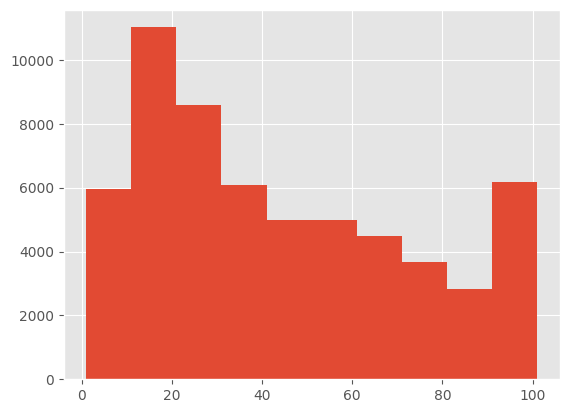

In [40]:
import matplotlib.pyplot as plt
plt.hist(train_df['total_material'])

+ Có nhiều bàn cờ có số điểm tương đối ít 
+ Có số ít bàn cờ lớn hơn 70 điểm 
+ Đỉnh ở 100 là do khi có 1 số quân cờ được phong khi ở cuối ván cờ 
+ Ta có thể chia bàn cờ làm 3 giai đoạn :
    - Giai đoạn tàn cuộc : < 30 điểm quân
    - Giai đoạn giữa cuộc : 30 < điểm quân < 60
    - Giai đoạn khai cuộc : > 60 điểm quân

In [41]:
endgame_df = train_df[train_df['total_material'] < 30]
midgame_df = train_df[(30 <= train_df['total_material']) & (train_df['total_material'] <= 60)]
opening_df = train_df[60 < train_df['total_material']]

In [42]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

def generate_model(data_to_train_on):
    val_df = data_to_train_on[-1000:]
    train_df = data_to_train_on[:-1000]
    
    X_train = np.stack(train_df['board'].apply(encode_fen_string))
    y_train = train_df['black_score']

    X_val = np.stack(val_df['board'].apply(encode_fen_string))
    y_val = val_df['black_score']
    
    model = Sequential([
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1),
    ])
    
    model.compile(
        optimizer='rmsprop',
        loss='mean_squared_error')

    history = model.fit(
        X_train,
        y_train,
        epochs=40,
        validation_data=(X_val, y_val))

    plt.style.use('ggplot')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    plt.title('Loss During Training')
    plt.show()
    
    return model

Epoch 1/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 180554.9062 - val_loss: 130756.5391
Epoch 2/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 136065.0469 - val_loss: 115549.8672
Epoch 3/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 117354.5859 - val_loss: 108154.2734
Epoch 4/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 110147.2969 - val_loss: 104367.1406
Epoch 5/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 106245.6797 - val_loss: 103847.3594
Epoch 6/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 105152.6172 - val_loss: 100403.6484
Epoch 7/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 124553.5625 - val_loss: 103441.7422
Epoch 8/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 97326.5391 - val_loss: 97588.5938
Epoch 9/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 90259.1406 - val_loss: 99824.6484
Epoch 10/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 97056.5000 - val_loss: 104503.8594
Epoch 11/40
755/755 ━━━━━━━━━━━━━━

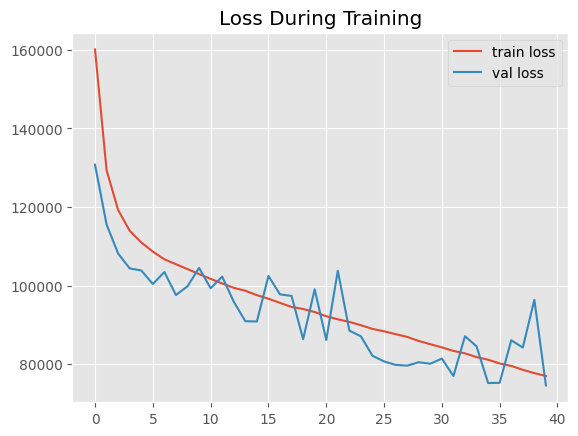

In [44]:
endgame_model = generate_model(endgame_df)

Epoch 1/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 166879.4688 - val_loss: 150219.6250
Epoch 2/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 143153.2031 - val_loss: 139148.5000
Epoch 3/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 136952.3281 - val_loss: 128392.9297
Epoch 4/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 122319.0938 - val_loss: 124462.5469
Epoch 5/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 114972.1875 - val_loss: 114343.2812
Epoch 6/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 106091.3750 - val_loss: 111198.0469
Epoch 7/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 102056.4219 - val_loss: 104898.1484
Epoch 8/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 99247.8594 - val_loss: 113994.8281
Epoch 9/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 96571.5234 - val_loss: 100498.4062
Epoch 10/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 93399.1328 - val_loss: 102248.5703
Epoch 11/40
485/485 ━━━━━━━━━━━━

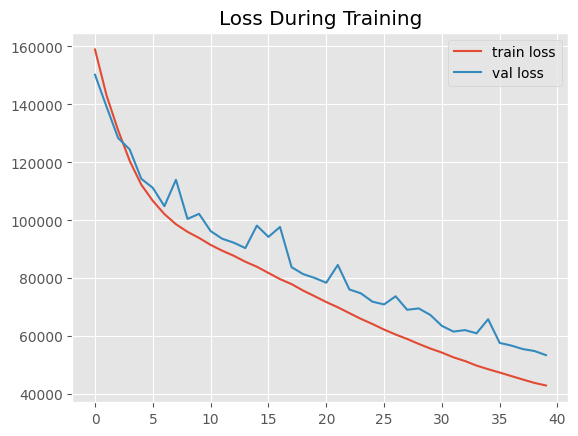

In [45]:
midgame_model = generate_model(midgame_df)

Epoch 1/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 121623.0625 - val_loss: 99912.3125
Epoch 2/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 105380.4609 - val_loss: 87548.5938
Epoch 3/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 96101.6250 - val_loss: 79400.6484
Epoch 4/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 88399.6094 - val_loss: 74048.7734
Epoch 5/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 81300.4531 - val_loss: 69506.0312
Epoch 6/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 73782.7422 - val_loss: 72226.2734
Epoch 7/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 72389.8203 - val_loss: 64263.0898
Epoch 8/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 67215.4531 - val_loss: 63315.8789
Epoch 9/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 66324.3281 - val_loss: 61599.2539
Epoch 10/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 64436.0508 - val_loss: 60981.8711
Epoch 11/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 13m

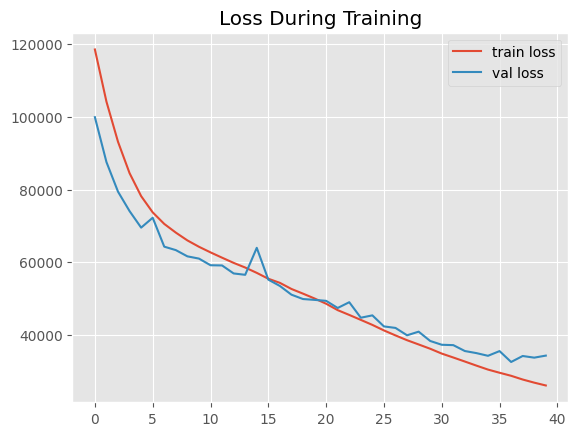

In [46]:
opening_model = generate_model(opening_df)

In [69]:
def play_nn(fen, show_move_evaluations=False):
    board = chess.Board(fen=fen)

    material = count_material(fen)
    if material < 30:
        model = endgame_model
    elif material < 60:
        model = midgame_model
    else:
        model = opening_model
    moves = []
    input_vectors = []
    for move in board.legal_moves:
        candidate_board = board.copy()
        candidate_board.push(move)
        moves.append(move)
        input_vector = encode_board(candidate_board).astype(np.float32)
        input_vector = input_vector.reshape(1, 8, 8, 13)  # Định dạng đúng cho mô hình
        input_vectors.append(input_vector)
    input_vectors = np.vstack(input_vectors)
    scores = model.predict(input_vectors, verbose=0)
    if board.turn == chess.BLACK:
        index_of_best_move = np.argmax(scores)
    else:
        index_of_best_move = np.argmax(-scores)

    if show_move_evaluations:
        print(zip(moves, scores))
        
    best_move = moves[index_of_best_move]

    return str(best_move)

In [70]:
from IPython.display import SVG, display

# Our play function accepts whatever strategy our AI is using, like play_random from above
def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        # We print out the board as an SVG
        display(SVG(board._repr_svg_()))

        # If it's white's turn, we have the user play
        if board.turn == chess.WHITE:
            user_move = input('Your move: ')
            if user_move == 'quit':
                break
            # The move a user puts in isn't a valid move, we keep prompting them for a valid move
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasn\'t a valid move. Please enter a move in Standard Algebraic Notation')
                user_move = input('Your move: ')
            board.push_san(user_move)

        # If it's black's turn, we have the AI play
        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())

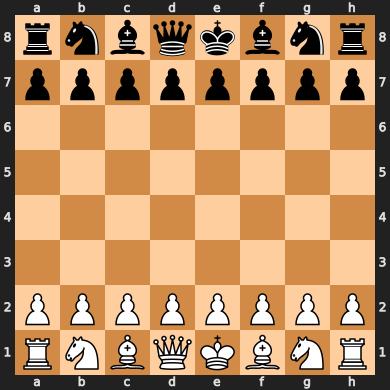

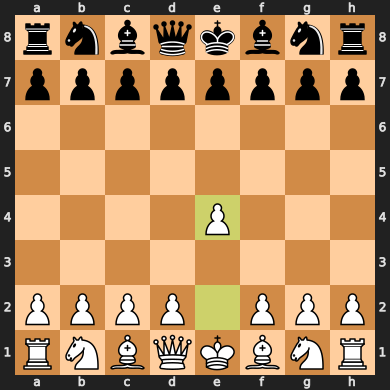

AI move: e7e6


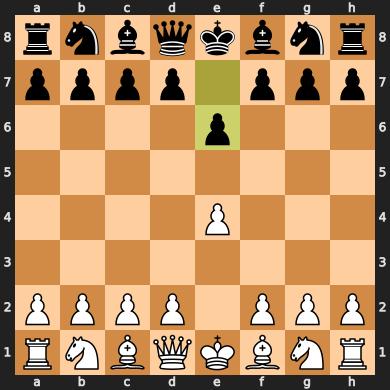

None


In [71]:
play_game(play_nn)

In [72]:
test_df = pd.read_csv('Data/test.csv')

test_df.head()

,id,board
0,7937,r1bqk2r/pp2bpp1/2n1pn1p/2pp4/3P1B2/2P1PN2/PP1N...
1,20035,2r2k1r/pp2pp1p/1q3npb/1B1N4/8/P4Q1P/1P3PP1/R2R...
2,71263,3b4/8/5k2/5p2/8/4K3/8/5B2 b - - 2 80
3,61997,5k2/R7/3r3p/2PP2pP/5pb1/P1K5/6B1/8 w - - 1 61
4,26510,r3r1k1/pb3p1p/1p1q2p1/3P1p2/3Q1P2/5N2/PP4PP/3R...


In [73]:
test_df['best_move'] = test_df['board'].apply(play_nn)

In [74]:
submission = test_df[['id', 'best_move']]
print(submission.head())

      id best_move
0   7937      c5d4
1  20035      b5c6
2  71263      f6f7
3  61997      c5d6
4  26510      h7h6
